In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_palette("colorblind")

%matplotlib inline

In [13]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(int)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-1.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1.000000


In [25]:
title_vs_gross = pd.DataFrame(tn_movie_budgets[['movie','ROI']])

title_vs_gross['movie'] = title_vs_gross['movie'].str.lower()
title_vs_gross['movie'] = title_vs_gross['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
title_vs_gross['movie'] = title_vs_gross['movie'].str.replace(r'(\w{2,})s\b', r'\1')

#display(title_vs_gross)

cleaned_titles_success = title_vs_gross.loc[title_vs_gross['ROI'] >= 1 ]
cleaned_titles_fail = title_vs_gross.loc[title_vs_gross['ROI'] <= 0 ]


words_success = cleaned_titles_success['movie'].str.split(expand=True).stack().value_counts()
words_fail = cleaned_titles_fail['movie'].str.split(expand=True).stack().value_counts()


words_success = words_success.reset_index()
words_fail = words_fail.reset_index()


words_success = words_success.rename(columns = {0:'count','index':'word'})
words_fail = words_fail.rename(columns = {0:'count','index':'word'})


stopwords = ['the','and','of','a','to','in','2','3','on','&','with','ii','for','is','it','harry','from','part',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]


words_success = words_success[~words_success['word'].isin(stopwords)]
words_fail = words_fail[~words_fail['word'].isin(stopwords)]


words_difference = words_success.merge(words_fail, on = 'word')

words_difference['difference'] = words_difference['count_x'] - words_difference['count_y']

display(words_difference.sort_values(by = 'difference', ascending = False).tail(25))

print(len(cleaned_titles_success))
print(len(cleaned_titles_fail))

,word,count_x,count_y,difference
266,young,2,5,-3
611,sin,1,4,-3
243,people,3,6,-3
434,rising,1,4,-3
710,butterfly,1,4,-3
437,romeo,1,4,-3
523,dangerou,1,5,-4
19,men,12,16,-4
16,story,13,17,-4
590,saint,1,5,-4


2621
2125


In [15]:
wedding_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('wedding')]
print('Median ROI for movies with "wedding" in the title:',wedding_roi['ROI'].median())
love_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('love')]
print('Median ROI for movies with "love" in the title:',love_roi['ROI'].median())

Median ROI for movies with "wedding" in the title: 2.434441657608696
Median ROI for movies with "love" in the title: 0.12843673846153847


In [16]:
seaborn_boxplot_df = pd.concat([wedding_roi,love_roi])

seaborn_boxplot_df['Word in Title'] = seaborn_boxplot_df['movie'].str.contains('wedding')
seaborn_boxplot_df.loc[seaborn_boxplot_df['Word in Title'] == True, ['Word in Title']] = 'Wedding'
seaborn_boxplot_df.loc[seaborn_boxplot_df['Word in Title'] == False, ['Word in Title']] = 'Love'

seaborn_boxplot_df

,movie,ROI,Word in Title
993,american wedding,1.298638,Wedding
1243,my best friend wedding,5.498335,Wedding
1375,wedding crasher,6.080459,Wedding
1772,mike and dave need wedding date,1.299942,Wedding
1786,the big wedding,0.490030,Wedding
...,...,...,...
5570,lovely and amazing,17.453928,Love
5574,the incredibly true adventure of two girl in love,8.908620,Love
5578,love and other catastrophe,1.972864,Love
5603,the love letter,-1.000000,Love


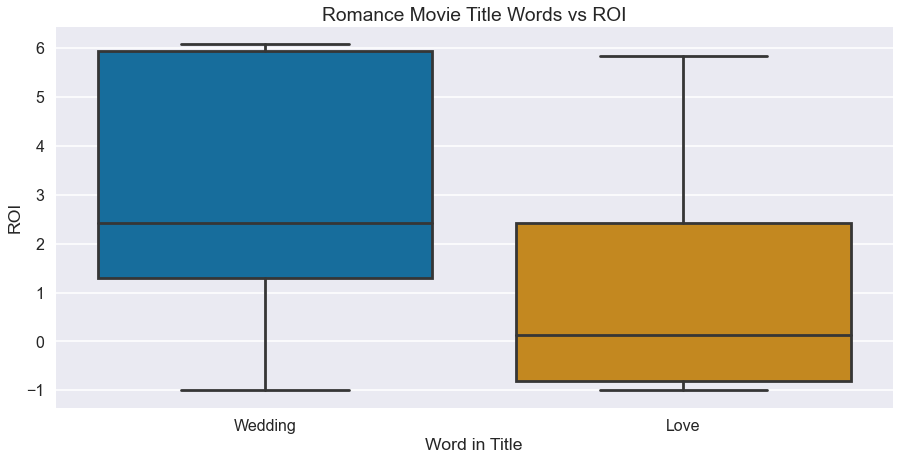

In [23]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = seaborn_boxplot_df['Word in Title'], y = seaborn_boxplot_df['ROI'], showfliers = False)
ax.set_title("Romance Movie Title Words vs ROI");

In [18]:
blood_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('blood')]
print('Median ROI for movies with "blood" in the title:',blood_roi['ROI'].median())
dead_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('dead')]
print('Median ROI for movies with "dead" in the title:',dead_roi['ROI'].median())

Median ROI for movies with "blood" in the title: -0.47600966
Median ROI for movies with "dead" in the title: -0.098728895


In [19]:
evil_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('evil')]
print('Median ROI for movies with "evil" in the title:',evil_roi['ROI'].median())
night_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('night')]
print('Median ROI for movies with "night" in the title:',night_roi['ROI'].median())

Median ROI for movies with "evil" in the title: 1.50337468
Median ROI for movies with "night" in the title: 1.34221785


In [20]:
thriller_boxplot_df = pd.concat([blood_roi,dead_roi,evil_roi,night_roi])

thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('blood'),['Word in Title']] = 'blood'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('dead'),['Word in Title']] = 'dead'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('evil'),['Word in Title']] = 'evil'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('night'),['Word in Title']] = 'night'

thriller_boxplot_df

,movie,ROI,Word in Title
19,harry potter and the half-blood prince,2.740855,blood
388,blood diamond,0.713779,blood
1170,blood work,-0.476010,blood
1328,rambo first blood part ii,5.827273,blood
1690,underworld blood war,1.320263,blood
...,...,...,...
5561,midnight cabaret,-1.000000,night
5587,nightlight,-0.915412,night
5620,the overnight,4.829980,night
5676,night of the living dead,262.921614,night


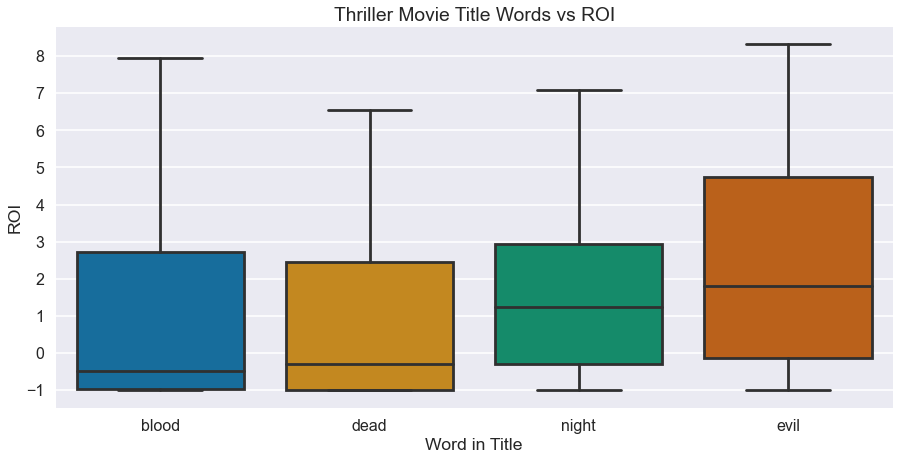

In [24]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = thriller_boxplot_df['Word in Title'], y = thriller_boxplot_df['ROI'], showfliers = False)
ax.set_title("Thriller Movie Title Words vs ROI");
ax.set_yticks(np.arange(-1,9));